## Exploratory Data Analisys
### Topic (**Inflation**) according to Publication

### Load
Data

In [59]:
import pandas as pd
import numpy as np

In [60]:
df = pd.read_csv('data/izq_econ_news.csv')

In [61]:
inf_izq = df.loc[df.flyer.str.contains('INFLA|INDEC|SUBA|PRECIO', na=False),'body']
inf_izq = inf_izq.reset_index()
inf_izq.drop('index', axis=1,inplace=True)

In [62]:
df = pd.read_csv('data/derecha_econ_news.csv')

In [63]:
inf_der = df.loc[df.title.str.contains('inflacion|inflación|emisión|salarios|salario|indec', na=False), 'body']
inf_der.dropna(inplace=True)
inf_der = inf_der.reset_index()
inf_der.drop('index', axis=1,inplace=True)

Tokens

In [92]:
tokens_izq = pd.read_pickle('tokens/topic_tokens_izq.pkl')
tokens_der = pd.read_pickle('tokens/topic_tokens_der.pkl')

In [12]:
tokens_izq_inf = tokens_izq[tokens_izq.topics == 'inflation'].drop('topics', axis=1)

In [14]:
tokens_der_inf = tokens_der[tokens_der.topics == 'inflation'].drop('topics', axis=1)

### Versus

#### Length
How many words?

In [102]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import unidecode

In [103]:
stopwords_sp = stopwords.words('spanish')

In [104]:
def tokenizer(texto):

    alphanumeric = re.sub(r'([^\s\w]|_)+', '', texto).lower()
    no_accents = unidecode.unidecode(alphanumeric)
    
    tockens = word_tokenize(no_accents)
    
    tockens_clean = [tocken for tocken in tockens if tocken not in stopwords_sp and tocken.isalpha()]
    
    terminos = tockens_clean

    return terminos

In [120]:
words_izq = [tokenizer(documento) for documento in inf_izq.body.values]
words_der = [tokenizer(documento) for documento in inf_der.body.values]

In [129]:
for i, (izq, der) in enumerate(zip(words_izq, words_der)):
    print(f'Collected doc. {i}: {len(izq)} words VS {len(der)} words')

Collected doc. 0: 192 words VS 256 words
Collected doc. 1: 118 words VS 329 words
Collected doc. 2: 91 words VS 249 words
Collected doc. 3: 211 words VS 251 words
Collected doc. 4: 215 words VS 291 words
Collected doc. 5: 418 words VS 402 words
Collected doc. 6: 154 words VS 319 words
Collected doc. 7: 142 words VS 364 words
Collected doc. 8: 147 words VS 293 words
Collected doc. 9: 159 words VS 297 words
Collected doc. 10: 135 words VS 377 words
Collected doc. 11: 129 words VS 268 words
Collected doc. 12: 226 words VS 337 words
Collected doc. 13: 212 words VS 371 words
Collected doc. 14: 116 words VS 781 words
Collected doc. 15: 119 words VS 355 words


#### Lexicon
How many unique words?

In [131]:
for i, (izq, der) in enumerate(zip(words_izq, words_der)):
    print(f'Collected doc. {i}: {len(set(izq))} words VS {len(set(der))} words')

Collected doc. 0: 148 words VS 188 words
Collected doc. 1: 104 words VS 258 words
Collected doc. 2: 82 words VS 189 words
Collected doc. 3: 171 words VS 207 words
Collected doc. 4: 170 words VS 211 words
Collected doc. 5: 285 words VS 309 words
Collected doc. 6: 131 words VS 253 words
Collected doc. 7: 94 words VS 275 words
Collected doc. 8: 113 words VS 205 words
Collected doc. 9: 125 words VS 208 words
Collected doc. 10: 119 words VS 260 words
Collected doc. 11: 103 words VS 183 words
Collected doc. 12: 133 words VS 246 words
Collected doc. 13: 180 words VS 283 words
Collected doc. 14: 102 words VS 529 words
Collected doc. 15: 95 words VS 283 words


#### Ratio
Unique words per words

In [135]:
for i, (izq, der) in enumerate(zip(words_izq, words_der)):
    print(f'Collected doc. {i}: {round(len(set(izq)) / len(izq),2)} words VS {round(len(set(der)) / len(der),2)} words')

Collected doc. 0: 0.77 words VS 0.73 words
Collected doc. 1: 0.88 words VS 0.78 words
Collected doc. 2: 0.9 words VS 0.76 words
Collected doc. 3: 0.81 words VS 0.82 words
Collected doc. 4: 0.79 words VS 0.73 words
Collected doc. 5: 0.68 words VS 0.77 words
Collected doc. 6: 0.85 words VS 0.79 words
Collected doc. 7: 0.66 words VS 0.76 words
Collected doc. 8: 0.77 words VS 0.7 words
Collected doc. 9: 0.79 words VS 0.7 words
Collected doc. 10: 0.88 words VS 0.69 words
Collected doc. 11: 0.8 words VS 0.68 words
Collected doc. 12: 0.59 words VS 0.73 words
Collected doc. 13: 0.85 words VS 0.76 words
Collected doc. 14: 0.88 words VS 0.68 words
Collected doc. 15: 0.8 words VS 0.8 words


### Clouds
Word count per corpus

In [183]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [196]:
def count_words(df):
    top_words = {}
    for column in df.transpose().columns:
        top = df.transpose()[column].sort_values(ascending=False).head(30)
        top_words[column] = list(zip(top.index, top.values))
    return top_words

In [197]:
top_words_izq = count_words(tokens_izq_inf)

In [198]:
words_izq = [word for docs, w_counts in top_words_izq.items() for word in list(word for word, num in w_counts)]

In [199]:
top_words_der = count_words(tokens_der_inf)

In [200]:
words_der = [word for docs, w_counts in top_words_der.items() for word in list(word for word, num in w_counts)]

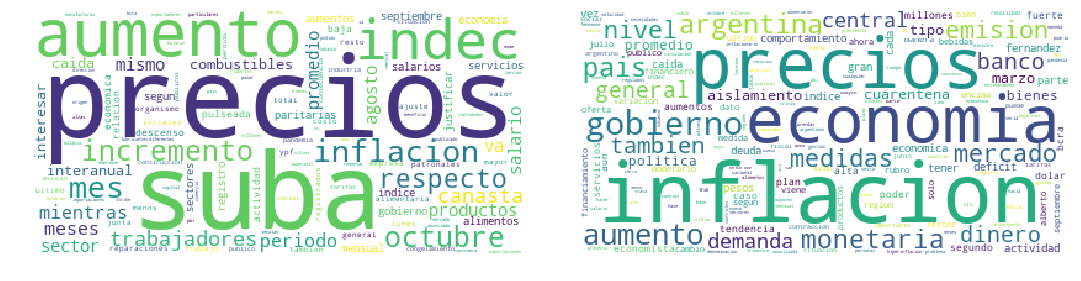

In [207]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,30))

cloud = WordCloud(background_color='white')

for words, ax in zip([words_izq, words_der], axes.flatten()):
    cloud.generate_from_frequencies(dict(Counter(words).most_common()))
    ax.imshow(cloud)
    ax.axis('off')
    
plt.show()

#### TfIDf
TfIDf score count per corpus

In [140]:
from sklearn.feature_extraction.text import TfidfTransformer

In [141]:
tfidf_izq = TfidfTransformer().fit_transform(tokens_izq_inf)
tfidf_der = TfidfTransformer().fit_transform(tokens_der_inf)

In [142]:
tfidf_izq_df = pd.DataFrame(tfidf_izq.todense(), columns = tokens_izq_inf.columns)
tfidf_der_df = pd.DataFrame(tfidf_der.todense(), columns = tokens_der_inf.columns)

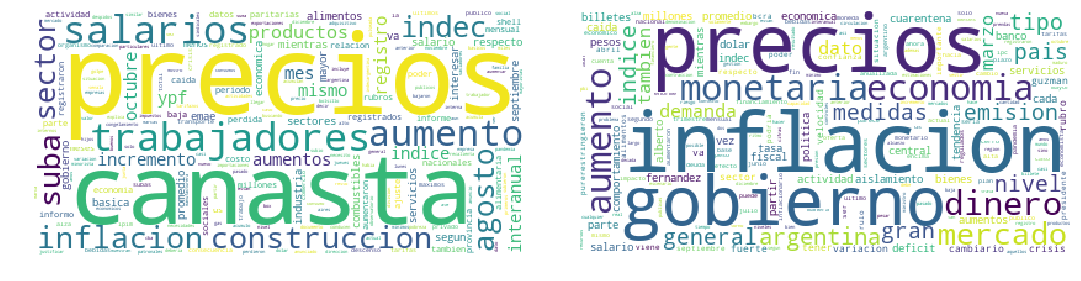

In [159]:
fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,30))

cloud = WordCloud(background_color='white')

for df, ax in zip([tfidf_izq_df, tfidf_der_df], axes.flatten()):
    cloud.generate_from_frequencies(df.sum(axis=0).sort_values())
    ax.imshow(cloud)
    ax.axis('off')
    
plt.show()

Observation
    
At first glance, it interesting to notice that, despite the topic, the term "inflación" amid the "izquierda diario" collected texts is not found among the top most important words.

Regarding the differences between clouds, "derecha diario" corpus counts more words with higher scores. It is clear also that each publication focuses on distintc themes around the same subject. Words like "precios", "trabajadores", "canasta" are absent in "derecha diario", while "dinero", "emision", "monetaria" do not appear in "izquierda diario" corpus, as well as "mercado".

According to this exploratory analisys, it is not so counter-intuitive to infer that one news portal gives more relevance to the impact of inflation to the so called "working class", while the other seems to put foward a reason to the phenomenon in question from a monetarist point of view.